In [4]:

# Importing the packages we will use in this project


import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data

df = pd.read_csv(r'C:\Users\user\Desktop\movies.csv')

In [5]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [7]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything miss
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Data Types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [78]:
df = df.dropna()
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [74]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980        11    8.4   927000.0      1795    2832   
1  3929       6      1  1980        10    5.8    65000.0      1578    1158   
2  3641       4      0  1980        11    8.7  1200000.0       757    1818   
3   204       4      4  1980        10    7.7   221000.0       889    1413   
4   732       6      4  1980        10    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0           11  
1   214       47   4500000   58853106      452    104.0           10  
2  1157       47  18000000  538375067      945    124.0           11  
3  1474       47   3500000   83453539     1108     88.0           10  
4   271       47   6000000   39846344     1083     98.0           10

In [29]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

     released  score      votes             director                   writer  \
5445     Dece    7.8  1100000.0        James Cameron            James Cameron   
7445     Apri    8.4   903000.0        Anthony Russo       Christopher Markus   
3045     Dece    7.8  1100000.0        James Cameron            James Cameron   
6663     Dece    7.8   876000.0          J.J. Abrams          Lawrence Kasdan   
7244     Apri    8.4   897000.0        Anthony Russo       Christopher Markus   
...       ...    ...        ...                  ...                      ...   
5640     Janu    5.8     3500.0  Francesca Gregorini  Tatiana von Fürstenberg   
2434     June    4.5     1900.0     Stephen Cornwell       Wallace C. Bennett   
3681     May     6.8    43000.0         John Fawcett             Karen Walton   
272      Marc    3.9     2300.0         Charles Band            Alan J. Adler   
3203     Octo    5.7     5800.0         George Huang                Andy Burg   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   
...                 ...            ...        ...         ...   
5640        Rooney Mara  United States    3000000        5073   
2434       Brad Johnson  United States    5000000        2970   
3681      Emily Perkins         Canada    5000000        2554   
272     Robert Glaudini  United States     800000        2270   
3203       Will Friedle  United States   15000000         309   

                        company  runtime yearcorrect  
5445      Twentieth Century Fox    162.0        Dece  
7445             Marvel Studios    181.0        Apri  
3045      Twentieth Century Fox    194.0        Dece  
6663                  Lucasfilm    138.0        Dece  
7244             Marvel Studios    149.0        Apri  
...                         ...      ...         ...  
5640           Two Prong Lesson     96.0        Janu  
2434           Trimark Pictures     97.0        June  
3681  Copperheart Entertainment    108.0        May   
272            Embassy Pictures     85.0        Marc  
3203                   Daybreak     85.0        Octo  

[5421 rows x 16 columns]

In [81]:
pd.set_option('display.max_rows', None)

In [79]:
#Drop any duplicates
df.drop_duplicates()

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980        11    8.4   927000.0      1795    2832   
1     3929       6      1  1980        10    5.8    65000.0      1578    1158   
2     3641       4      0  1980        11    8.7  1200000.0       757    1818   
3      204       4      4  1980        10    7.7   221000.0       889    1413   
4      732       6      4  1980        10    7.3   108000.0       719     351   
5     1509       6      9  1980        13    6.4   123000.0      1758    3081   
6     3930       6      0  1980        11    7.9   188000.0       974     576   
7     3122       6      3  1980         7    8.2   330000.0      1269    1257   
8     3732       4      0  1980        11    6.8   101000.0      1606    1402   
9     4401       6      3  1980        13    7.0    10000.0      2011     280   
10     332       4      0  1980         7    6.1    18000.0       236    2810   
11    4179       4      1  1980        15    7.3    54000.0       817    1300   
12    3029       4      1  1980         7    5.3    30000.0      1643    1658   
13    2859       6      6  1980        16    7.7    49000.0      1666    1653   
14    1208       6      5  1980        10    7.1    37000.0       207     350   
15    3553       4      6  1980        15    7.2    27000.0       847    2507   
17      66       4      4  1980         7    6.9    29000.0       333    2315   
18    4143       6      9  1980         8    6.8    66000.0       943    1486   
20     986       6      5  1980         8    6.5    20000.0      2032    3151   
21    1762       6      1  1980         5    6.8    14000.0      1307    2065   
22    4128       4      0  1980         6    6.7    22000.0       502    2959   
23    5289       4      8  1980         6    5.3    12000.0      1654    2492   
28     700       6      5  1980        11    7.2    17000.0      1870    3099   
29     261       6      5  1980         8    6.2    22000.0      1489    2358   
33     785       4      6  1980         5    6.1      604.0      1146     673   
35    3068       6      4  1980        15    6.2    24000.0       744    2207   
36    4245       6      4  1980        13    6.3     4300.0       581     966   
37    2618       6      4  1980        15    6.0    11000.0      1116    2578   
42    4736       6      0  1980        11    7.1     9000.0      1613    1802   
46    4312       6      0  1980        11    5.3     3900.0      1337    2383   
48    4512       4      0  1980        13    5.1     3100.0       329    2036   
50    3648       4      4  1980        16    7.3    22000.0      2043    3184   
51    2497       6      4  1980        16    6.8     4500.0      1025     303   
53     692       4      0  1980        11    6.1    11000.0       327     768   
56    5193       4      0  1980        12    4.6     2600.0       793    1078   
57    2818       4      4  1980        10    5.4     2400.0       914    2623   
58    4519       6      0  1980         6    5.1     5200.0       551    1819   
75    4351       1      1  1980        11    5.8     1300.0       267     939   
77    5240       6      4  1980         6    5.9      415.0      1484    1339   
80    2971       6      6  1980        16    4.0      546.0       969    1014   
92    1973       4      0  1981        11    8.4   905000.0      1859    1806   
94     284       6      4  1981         6    7.5    97000.0       974    1524   
95    1301       6      0  1981        10    7.2   131000.0       943    1486   
96    4100       2      9  1981         5    7.5   192000.0      1735    2707   
97    3031       6      4  1981        12    6.2    40000.0       177     307   
98     603       6      5  1981        10    7.4    47000.0       207     350   
99     861       4      0  1981        11    6.9    42000.0       478     277   
100   1329       6      1  1981         5    7.4    59000.0       937    2963   
101   2389       6      0  1981      

<function matplotlib.pyplot.show(close=None, block=None)>

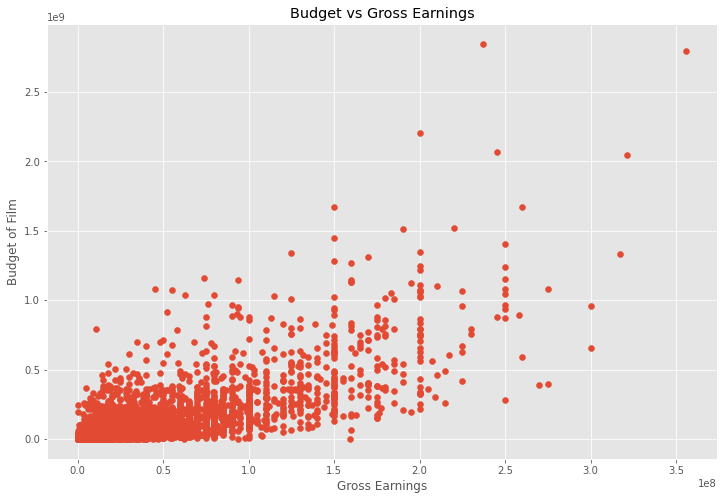

In [80]:
#budget High Correlation
#Company High Correlation
#scatter plot with budget vs Gross
plt.scatter(x= df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Film')
plt.show

In [40]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

  released  score      votes         director                   writer  \
0     June    8.4   927000.0  Stanley Kubrick             Stephen King   
1     July    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2     June    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3     July    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4     July    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime yearcorrect  
0    146.0        June  
1    104.0        July  
2    124.0        June  
3     88.0        July  
4     98.0        July

<AxesSubplot:xlabel='budget', ylabel='gross'>

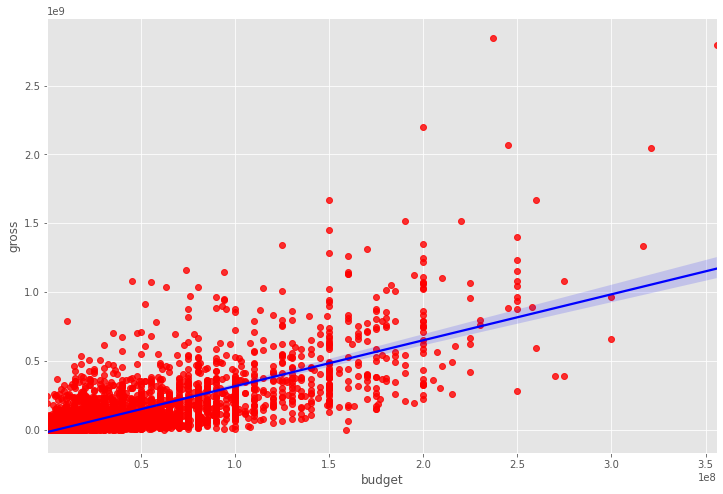

In [44]:
#plot budget vs Gross Using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [45]:
df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [46]:
df.corr(method='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.239539  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.239539  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064824  0.292254  0.205344  0.231278  0.176979  1.000000

In [48]:
df.corr(method='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.057741  0.427623  0.312886  0.351045  0.095444
score    0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155
votes    0.427623  0.495409  1.000000  0.493461  0.745793  0.300621
budget   0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794
gross    0.351045  0.183192  0.745793  0.692958  1.000000  0.257400
runtime  0.095444  0.412155  0.300621  0.330794  0.257400  1.000000

In [52]:
#high correlation betwen Budget and Gross

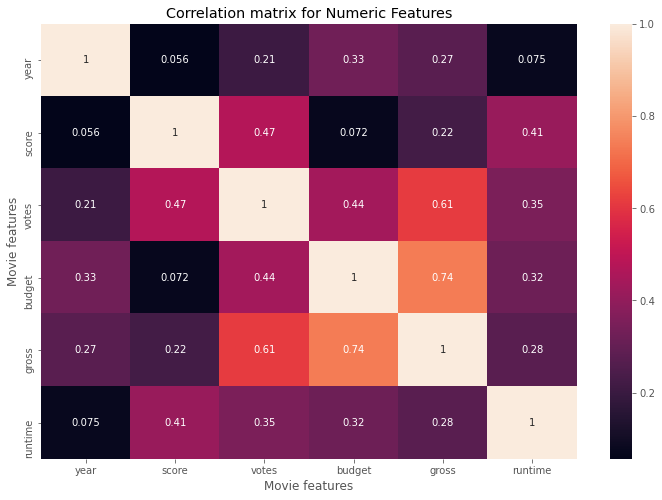

In [54]:
correaltion_matrix = df.corr(method='pearson')

sns.heatmap(correaltion_matrix, annot= True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [77]:
#Looks at company
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980        11    8.4   927000.0      1795    2832   
1     3929       6      1  1980        10    5.8    65000.0      1578    1158   
2     3641       4      0  1980        11    8.7  1200000.0       757    1818   
3      204       4      4  1980        10    7.7   221000.0       889    1413   
4      732       6      4  1980        10    7.3   108000.0       719     351   
5     1509       6      9  1980        13    6.4   123000.0      1758    3081   
6     3930       6      0  1980        11    7.9   188000.0       974     576   
7     3122       6      3  1980         7    8.2   330000.0      1269    1257   
8     3732       4      0  1980        11    6.8   101000.0      1606    1402   
9     4401       6      3  1980        13    7.0    10000.0      2011     280   
10     332       4      0  1980         7    6.1    18000.0       236    2810   
11    4179       4      1  1980        15    7.3    54000.0       817    1300   
12    3029       4      1  1980         7    5.3    30000.0      1643    1658   
13    2859       6      6  1980        16    7.7    49000.0      1666    1653   
14    1208       6      5  1980        10    7.1    37000.0       207     350   
15    3553       4      6  1980        15    7.2    27000.0       847    2507   
17      66       4      4  1980         7    6.9    29000.0       333    2315   
18    4143       6      9  1980         8    6.8    66000.0       943    1486   
20     986       6      5  1980         8    6.5    20000.0      2032    3151   
21    1762       6      1  1980         5    6.8    14000.0      1307    2065   
22    4128       4      0  1980         6    6.7    22000.0       502    2959   
23    5289       4      8  1980         6    5.3    12000.0      1654    2492   
28     700       6      5  1980        11    7.2    17000.0      1870    3099   
29     261       6      5  1980         8    6.2    22000.0      1489    2358   
33     785       4      6  1980         5    6.1      604.0      1146     673   
35    3068       6      4  1980        15    6.2    24000.0       744    2207   
36    4245       6      4  1980        13    6.3     4300.0       581     966   
37    2618       6      4  1980        15    6.0    11000.0      1116    2578   
42    4736       6      0  1980        11    7.1     9000.0      1613    1802   
46    4312       6      0  1980        11    5.3     3900.0      1337    2383   
48    4512       4      0  1980        13    5.1     3100.0       329    2036   
50    3648       4      4  1980        16    7.3    22000.0      2043    3184   
51    2497       6      4  1980        16    6.8     4500.0      1025     303   
53     692       4      0  1980        11    6.1    11000.0       327     768   
56    5193       4      0  1980        12    4.6     2600.0       793    1078   
57    2818       4      4  1980        10    5.4     2400.0       914    2623   
58    4519       6      0  1980         6    5.1     5200.0       551    1819   
75    4351       1      1  1980        11    5.8     1300.0       267     939   
77    5240       6      4  1980         6    5.9      415.0      1484    1339   
80    2971       6      6  1980        16    4.0      546.0       969    1014   
92    1973       4      0  1981        11    8.4   905000.0      1859    1806   
94     284       6      4  1981         6    7.5    97000.0       974    1524   
95    1301       6      0  1981        10    7.2   131000.0       943    1486   
96    4100       2      9  1981         5    7.5   192000.0      1735    2707   
97    3031       6      4  1981        12    6.2    40000.0       177     307   
98     603       6      5  1981        10    7.4    47000.0       207     350   
99     861       4      0  1981        11    6.9    42000.0       478     277   
100   1329       6      1  1981         5    7.4    59000.0       937    2963   
101   2389       6      0  1981      

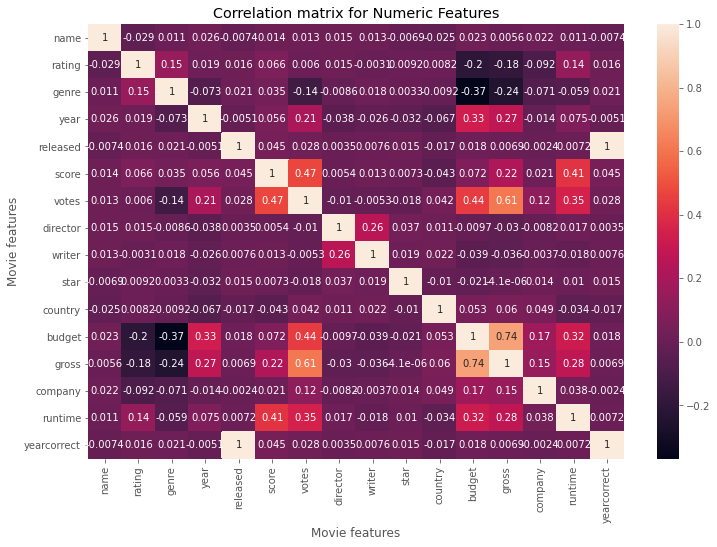

In [61]:
correaltion_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correaltion_matrix, annot= True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [62]:
df.numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.007371  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.015532  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.021306  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.005073  0.056386   
released    -0.007371  0.015532  0.021306 -0.005073  1.000000  0.045136   
score        0.014450  0.065983  0.035106  0.056386  0.045136  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.027535  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.003497  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.007594  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.014919  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.016957 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.018328  0.072001   
gross        0.005639 -0.181906 -0.244101  0.274321  0.006873  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002361  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.007167  0.414068   
yearcorrect -0.007371  0.015532  0.021306 -0.005073  1.000000  0.045136   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.027535  0.003497  0.007594  0.014919 -0.016957  0.018328   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.027535  0.003497  0.007594  0.014919 -0.016957  0.018328   

                gross   company   runtime  yearcorrect  
name         0.005639  0.021697  0.010850    -0.007371  
rating      -0.181906 -0.092357  0.140792     0.015532  
genre       -0.244101 -0.071334 -0.059237     0.021306  
year         0.274321 -0.014333  0.075077    -0.005073  
released     0.006873 -0.002361  0.007167     1.000000  
score        0.222556  0.020656  0.414068     0.045136  
votes        0.614751  0.118470  0.352303     0.027535  
director    -0.029560 -0.008223  0.017433     0.003497  
writer      -0.035885 -0.003697 -0.017561     0.007594  
star        -0.000004  0.014082  0.010108     0.014919  
country      0.060078  0.048569 -0.034477    -0.016957  
budget       0.740247  0.170235  0.318695     0.018328  
gross        1.000000  0.149553  0.275796     0.006873  
company      0.149553  1.000000  0.037585    -0.002361  
runtime      0.275796  0.037585  1.000000     0.007167  
yearcorrect  0.006873 -0.002361  0.007167     1.000000

In [64]:
correlation_mat = df.numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.007371
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect   -0.007371
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.015532
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [65]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
company      rating        -0.092357
rating       company       -0.092357
genre        year          -0.073167
year         genre         -0.073167
company      genre         -0.071334
genre        company       -0.071334
country      year          -0.066748
year         country       -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
budget       writer        -0.039466
year         director      -0.038354
director     year          -0.038354
gross        writer        -0.035885
w

In [67]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  released       1.000000
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     yearcorrect    1.000000
             released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [51]:
#votes and budget have the hihest correlation to gross Earnings 
#company has low correlation

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'callable' was supplied